In [1]:
from matplotlib import pyplot as plt

In [34]:
# Equation for the chagne in neutrons
def d_n(num_neutrons, reactivity, mean_neutron_gen_time, prompt_neutron_lifetime, sum_precursors):
    return (reactivity-0.006)/mean_neutron_gen_time*num_neutrons+sum_precursors

In [35]:
# equation for the change in neutron precursors
def d_C(num_neutrons, delayed_neutron_fraction, mean_neutron_gen_time, precursor_decay_const, concentration):
    return delayed_neutron_fraction/mean_neutron_gen_time*num_neutrons-precursor_decay_const*concentration

In [36]:
# U-235 delayed neutron precursors
lambda_i=[0.0124,0.0305,0.111,0.301,1.14,3.01]
beta=[0.000215,0.001424,0.001274,0.002568,0.000748,0.000237]

In [139]:
#initial conditions
neutrons=10000 #number of neutrons
mean_neutron_gen_time=0.08 #prompt neutron generation time
prompt_neutron_life_time=2e-5
precursor_concentrations=[0.0,0.0,0.0,0.0,0.0,0.0]

dt=0.00001 #timestep
neutrons_t=[]
precursor_concentrations_t=[]

#simulate

for i in range(10000000):
    
    #reactivity schedule
    if(i<10000):
        reactivity=-0.05
    
    # update neutrons
    new_neutrons=neutrons+dt*d_n(neutrons, reactivity, mean_neutron_gen_time, prompt_neutron_life_time, sum(precursor_concentrations))
    
    #update precursors
    new_precursor_concentrations=[]
    for n in range(6):
        new_precursor_concentrations.append(precursor_concentrations[n]+dt*d_C(neutrons, beta[n],mean_neutron_gen_time, lambda_i[n],precursor_concentrations[n]))
        
    neutrons=new_neutrons
    precursor_concentrations=new_precursor_concentrations
    
    #save current timestep values
    neutrons_t.append(neutrons)
    precursor_concentrations_t.append(precursor_concentrations)

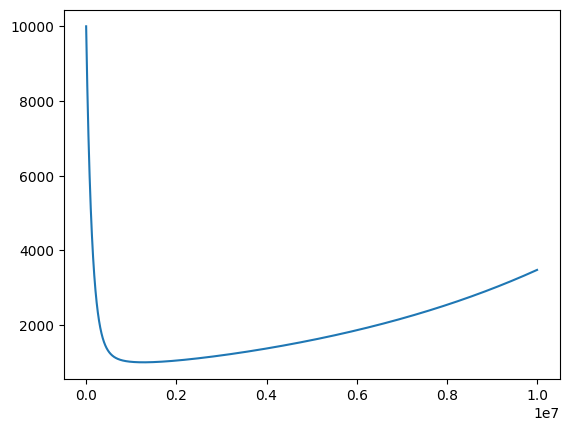

In [140]:
plt.plot(neutrons_t)

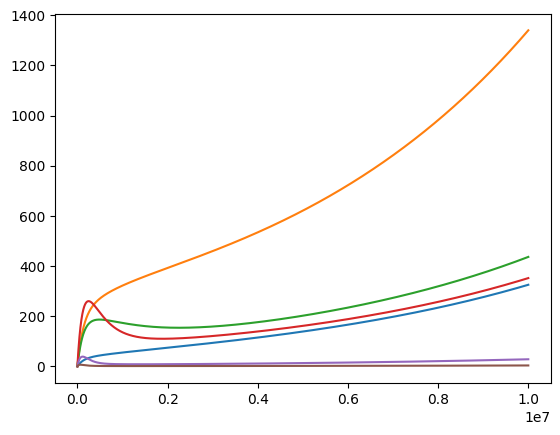

In [141]:
plt.plot(precursor_concentrations_t)